In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format



In [47]:
data = pd.read_csv('/Users/apple/Desktop/amsterdam_tech/m5w5/archive/student-mat.csv')

We have an excellent set which contains information about the life of students of mathematical courses and their academic success.  As for me, I am very interested to examine in detail the information about the students and find out what influences their grades the most.
The owner of the dataset suggests paying attention to the amount of alcohol consumed by students. This is a really interesting topic. Let's start.

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Lots of data. This is very encouraging! I can assume that many of the data obtained by questioning.  For example, alcohol consumption. 1 is low and 5 is high. But for someone to drink a glass of wine once a week is a lot, and for someone it is considered insignificant.  It would be better to have precise values.
First, let's look at the gender of our students. Count the number of boys and girls.

Text(0.5, 1.0, 'Gender of students : F - female,M - male')

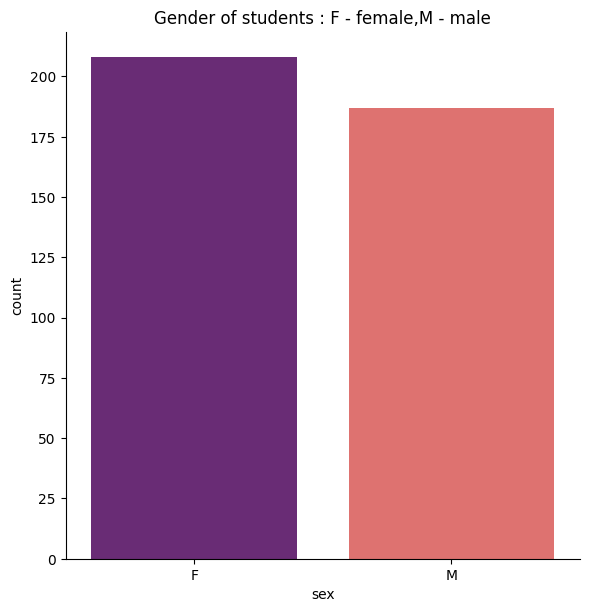

In [4]:
sns.catplot(x="sex", kind="count",palette="magma", data=data, height = 6)
plt.title("Gender of students : F - female,M - male")

The number of girls is a little more. We will come back to the gender of students when we consider the final grades of students and so on.  
Now let's pay attention to the age of students. After all, we assume, for example, that the younger the student the less likely that he uses alcohol.

In [5]:
ages = data["age"].value_counts()
labels = (np.array(ages.index))
sizes = (np.array((ages / ages.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Аge of students")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="age")

And so, basically we are dealing with students 15-18 years.  The most beautiful, but very often is a difficult age.
Teenagers want to relax more with friends and learn less math

Then let's see how many hours a week students spend on their studies.

In [6]:
data['st_time'] = np.nan
df = [data]

for col in df:
    col.loc[col['studytime'] == 1 , 'st_time'] = '< 2 hours'
    col.loc[col['studytime'] == 2 , 'st_time'] = '2 to 5 hours'
    col.loc[col['studytime'] == 3, 'st_time'] = '5 to 10 hours'
    col.loc[col['studytime'] == 4, 'st_time'] = '> 10 hours'

labels = data["st_time"].unique().tolist()
amount = data["st_time"].value_counts().tolist()

colors = ["pink", "cyan", "green", "yellow"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))
dt = [trace]
layout = go.Layout(title="Study time")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename='pie')

Most students spend 2 to 5  and 5 to 10 hours a week studying.   It would be better if we had the exact number of hours for each student. Personally, I think a student who spends 5 hours a week studying is a diligent student. 2 hours is not always enough.
But we can pay attention to the impact of the number of hours spent on study on the final grade of the student.

<Axes: title={'center': 'Box plot for final grades,depending on the study time'}, xlabel='G3', ylabel='st_time'>

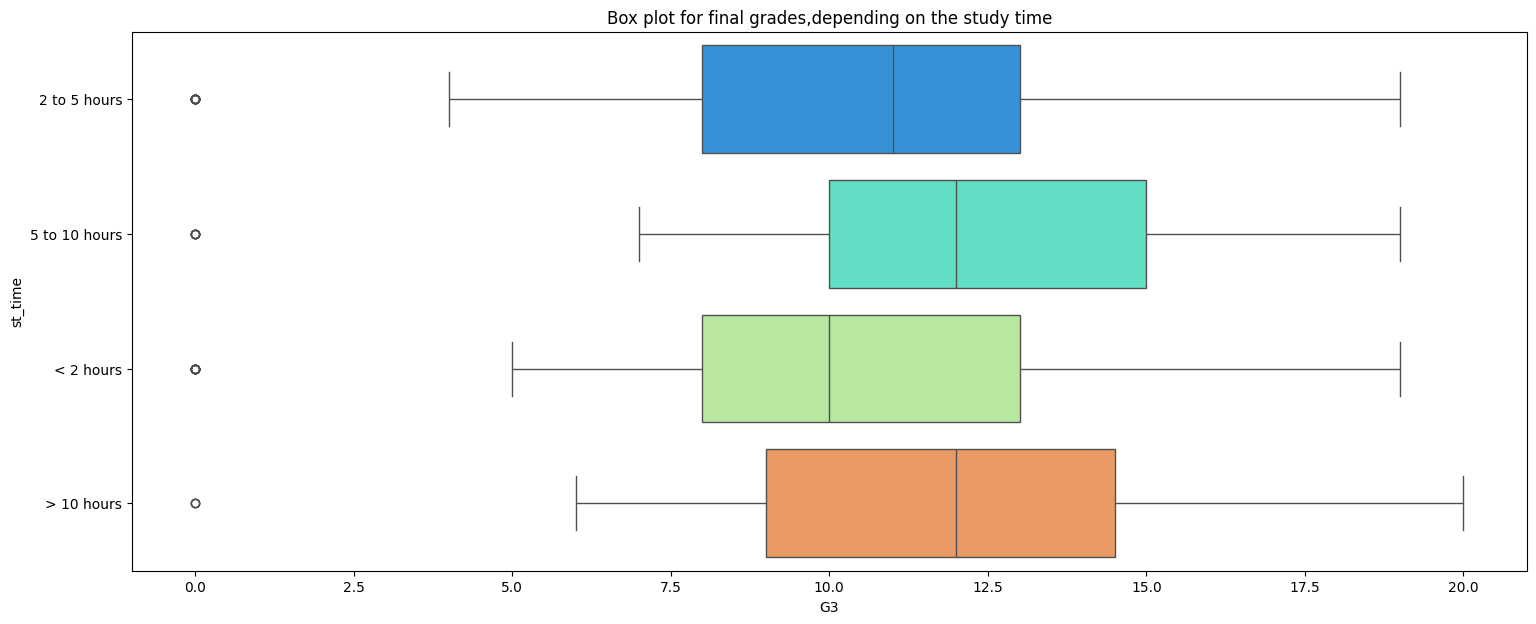

In [7]:
plt.figure(figsize=(18,7))
plt.title("Box plot for final grades,depending on the study time")
sns.boxplot(y="st_time", x="G3", data = data , orient="h", palette = 'rainbow')

The lowest average result is shown by students who spend less than two hours a week studying.   Of course! I am a student and I can say that this time is not enough. Especially when it comes to mathematics.  Few students spend more than 10 hours a week studying. But they show a very good result.
Sometimes we're all lazy. But we must try to find time to study and good grades will become stable.
We have information about the student's place of residence: city or village.  Let's see. This may be useful to us in the future. Perhaps students living in the city are much more likely to attend parties with alcohol or are busy with more interesting things than studying. Or students living in villages may be too lazy to get to school and miss classes. Also display the time that students spend on the way to school ( 1 - very close, 4 - very far).

Text(0.5, 1.0, 'Students address: U - urban, R - rural')

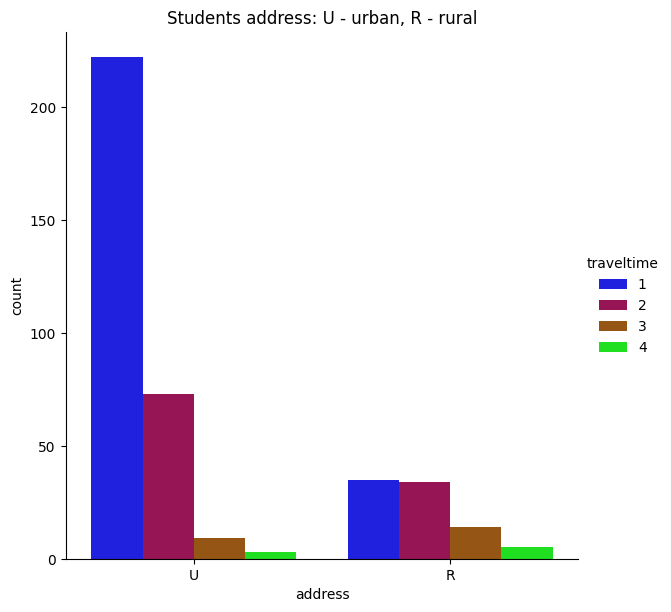

In [8]:
sns.catplot(x="address", kind="count",hue = "traveltime",palette="brg", data=data, height = 6)
plt.title("Students address: U - urban, R - rural")

Most of the students live in the city. Few students take long to get to school.  But still, let's see if this affects the number of absences.

Text(0.5, 1.0, 'Distribution of absences for students who live in village')

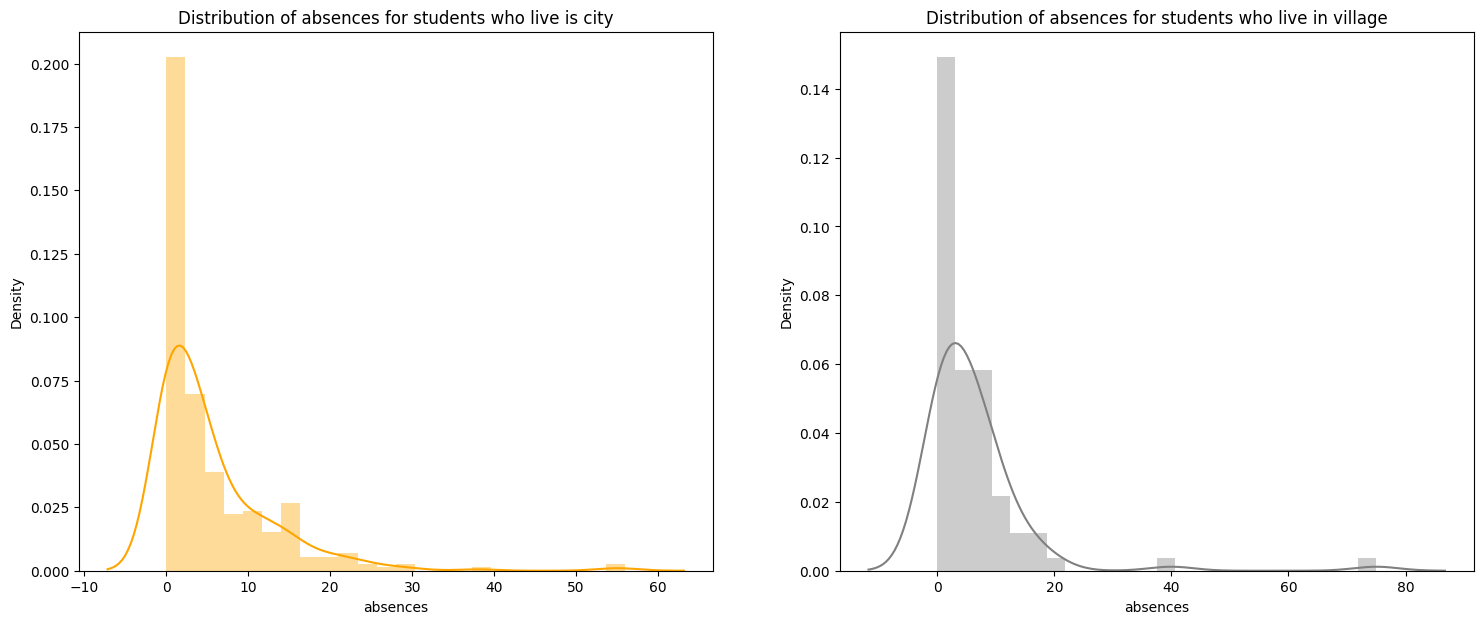

In [54]:
f= plt.figure(figsize=(18,7))

ax=f.add_subplot(121)
sns.distplot(data[(data.address == 'U')]["absences"],color='orange',ax=ax)
ax.set_title('Distribution of absences for students who live is city')

ax=f.add_subplot(122)
sns.distplot(data[(data.address == 'R')]['absences'],color='gray',ax=ax)
ax.set_title('Distribution of absences for students who live in village')

Yet among the students living in the village there are people with a lot of absences. But while we can not say for sure that this is due to the fact that the student does not live in the city.  But of course this may be due to traffic jams on the road or not a very good transport schedule.  

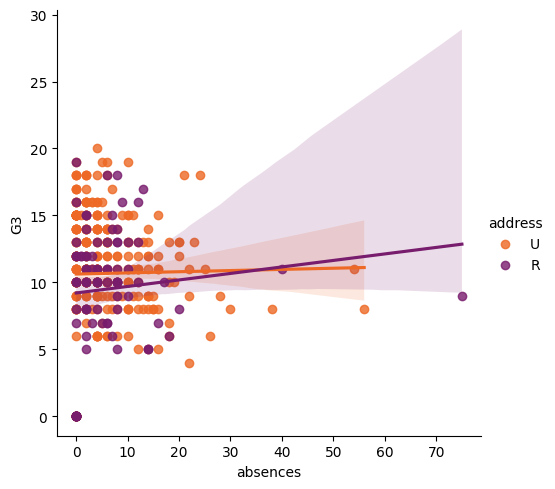

In [11]:
sns.lmplot(x="absences", y="G3",hue = 'address',data=data, palette = 'inferno_r')


But let's study students absences in more detail.  We have information about the romantic relationships of students: there is a relationship or not.  Given the age of our students, we can assume that love has an important place in their lives. Let's see if the presence of love and relationships affects the number of absences.


Text(0.5, 1.0, 'Distribution of absences for classes by people in love')

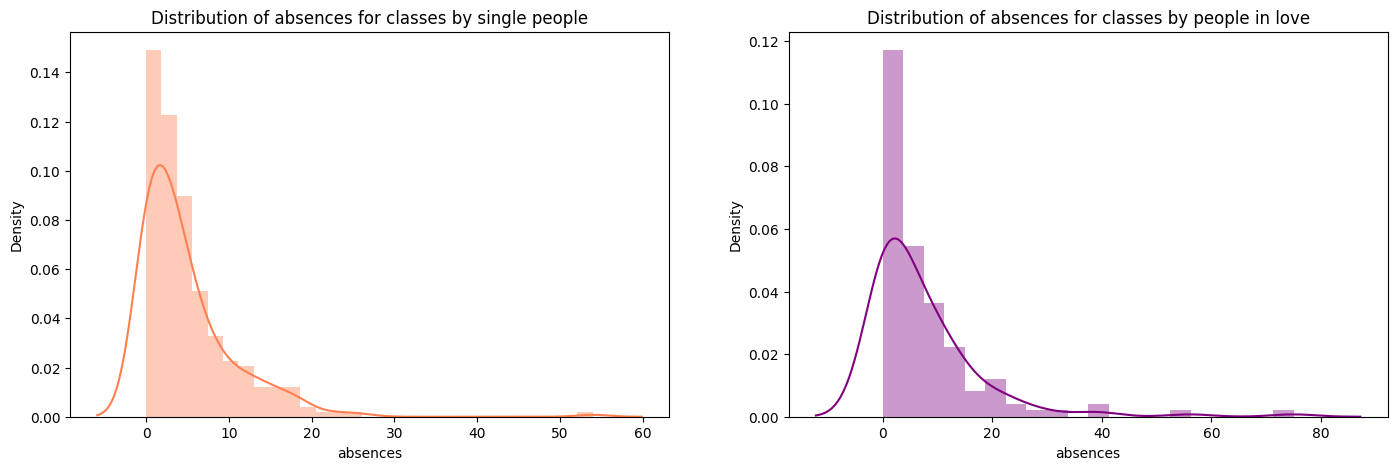

In [12]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["absences"],color='coral',ax=ax)
ax.set_title('Distribution of absences for classes by single people')

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['absences'],color='purple',ax=ax)
ax.set_title('Distribution of absences for classes by people in love')

Single people miss fewer classes. But how can we be mad at teenagers for being in love?
Let's see if this affects the final grade.

Text(0.5, 1.0, 'Distribution of grades in people in love')

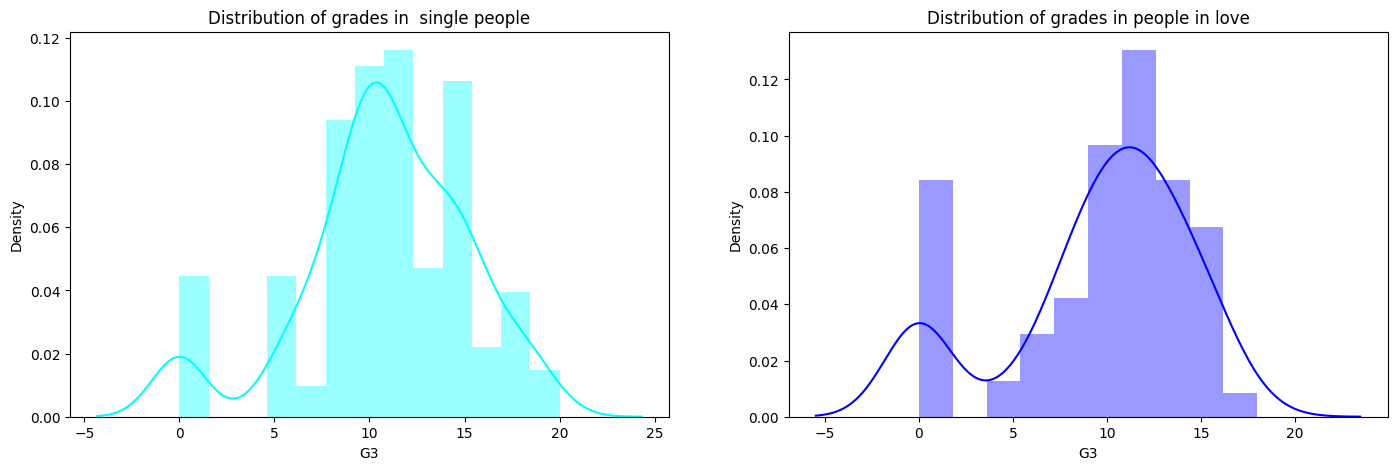

In [55]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["G3"],color='cyan',ax=ax)
ax.set_title('Distribution of grades in  single people')

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['G3'],color='blue',ax=ax)
ax.set_title('Distribution of grades in people in love')

The final grades of single students are slightly higher than those who are in a romantic relationship. Of course this is due to the fact that teenagers in love want to spend more time with  girlfriend or boyfriend than with a textbook in mathematics.
Let's count the number of single students and those who are in a relationship.

Text(0.5, 1.0, 'How many students are in a romantic relationship?')

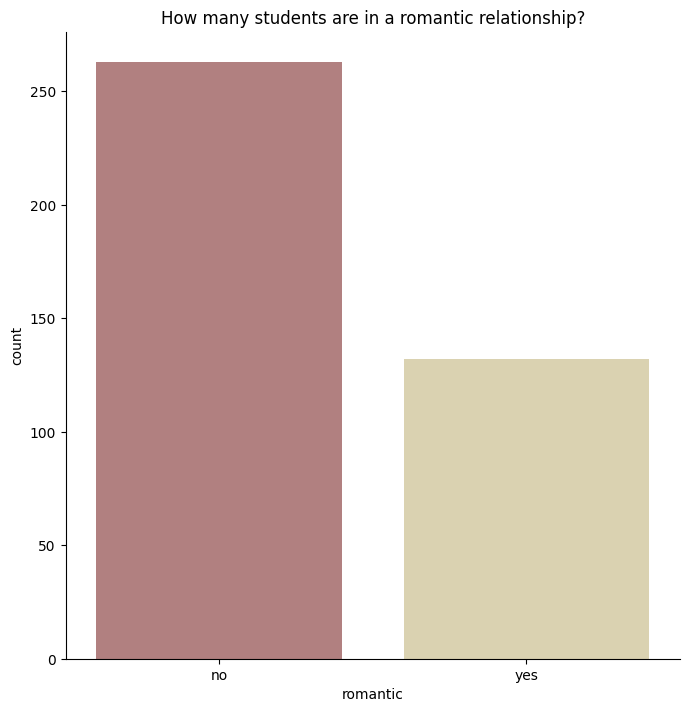

In [15]:
sns.catplot(x="romantic", kind="count",palette="pink", data=data, height = 7)
plt.title("How many students are in a romantic relationship?")

Now consider one very important thing. Students health! In our sample of very young teenagers and I hope that they all have excellent health.

In [16]:
labels = data["health"].unique().tolist()
amount = data["health"].value_counts().tolist()

colors = ["coral","lightgreen","pink","cyan","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Current health status (numeric: from 1 - very bad to 5 - very good)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'h_chart')

Let's see if the health of the student affects  final grades and the number of passes.

<Axes: title={'center': 'Box plot for final grades,depending on current health'}, xlabel='G3', ylabel='health'>

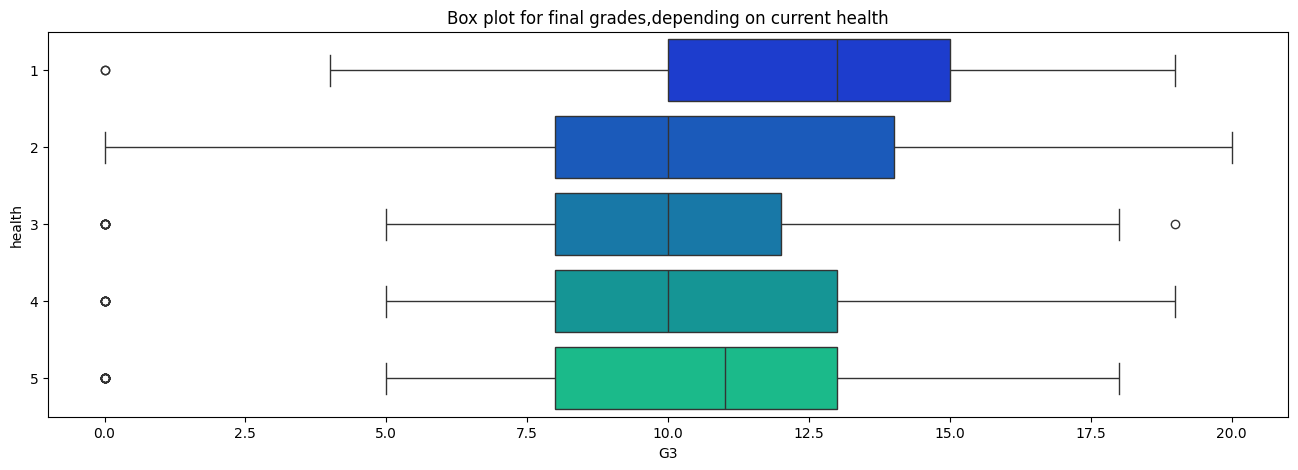

In [17]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on current health")
sns.boxplot(y="health", x="G3", data = data , orient="h", palette = 'winter')

Interesting situation. In our enrollment, 66 students have very poor health. But nevertheless their final estimates are quite high.
I hope that they think not only about their success in school but also about health!
Also, students with very good health have high final grades.  Now look at the absenteeism.

<Axes: title={'center': 'Box plot for absences,depending on current health'}, xlabel='absences', ylabel='health'>

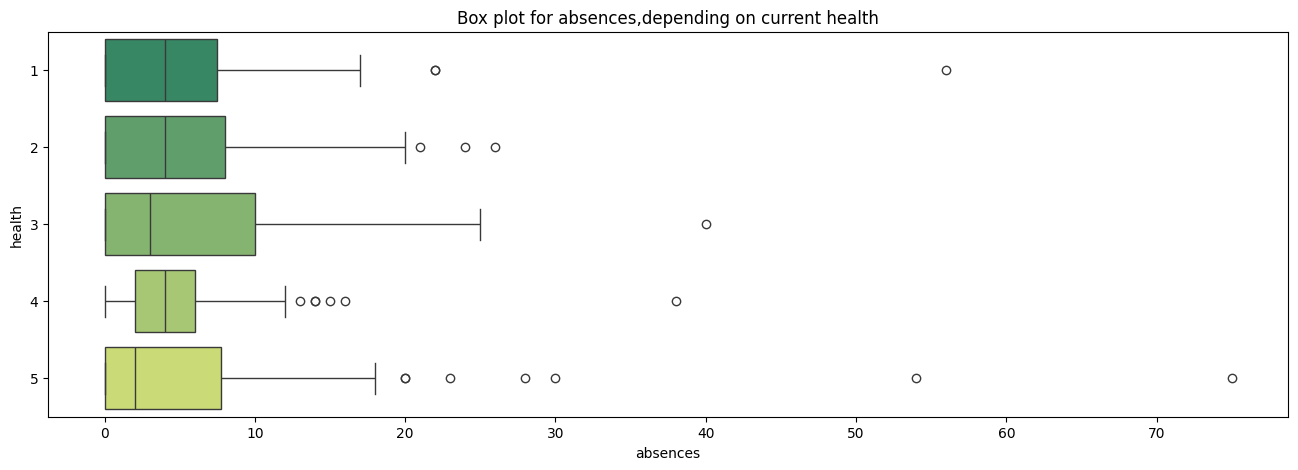

In [18]:
plt.figure(figsize=(16,5))
plt.title("Box plot for absences,depending on current health")
sns.boxplot(y="health", x="absences", data = data , orient="h", palette = 'summer')

There is no tangible connection between the level of health of the student and the number of absences to classes.  
But here you can see that students with high final grades miss less classes :)
Since we are talking about health will look at alcohol consumption by students.

We have data on the amount of alcohol consumed by students on weekdays("Dalc") and weekends("Walc"). The main thing we are interested in is whether the amount of alcohol consumed affects success in school. Let's see!
Let's start with alcohol consumption on weekdays.

In [19]:
labels = data["Dalc"].unique().tolist()
amount = data["Dalc"].value_counts().tolist()

colors = ["pink","lightgreen","white","cyan","gray"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'rt')

Um. Most students prefer to spend a week sober or almost without alcohol. But still there is someone who likes to drink on a weekday. Let's see if that affects student grades and absences.

Text(0.5, 1.0, 'Distribution of absences for people who consume little alcohol on weekdays')

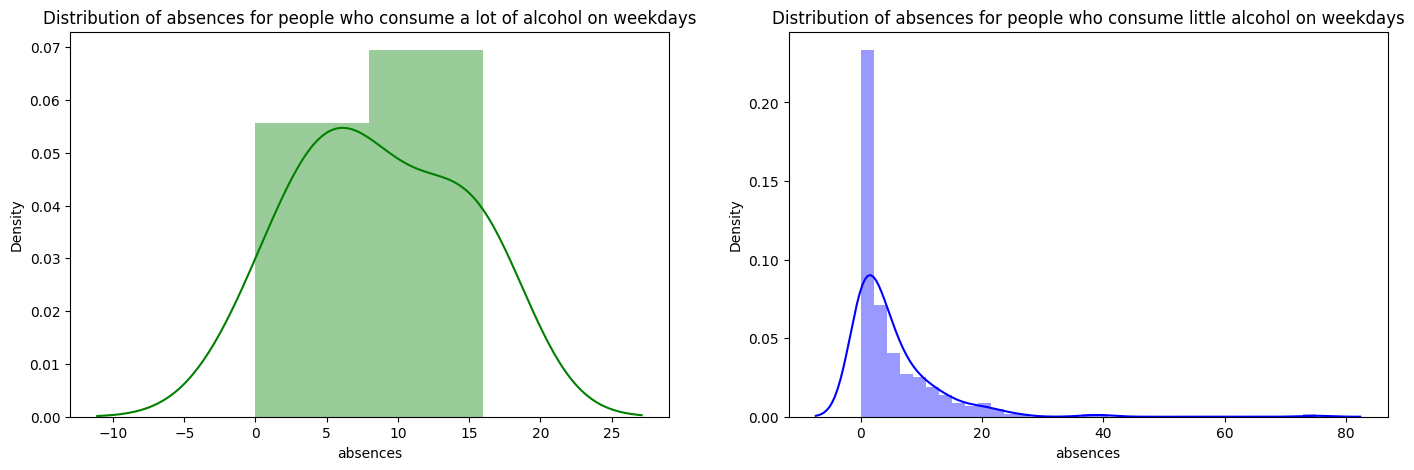

In [22]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Dalc == 5)]["absences"],color='green',ax=ax)
ax.set_title('Distribution of absences for people who consume a lot of alcohol on weekdays')

ax=f.add_subplot(122)
sns.distplot(data[(data.Dalc == 1)]['absences'],color='blue',ax=ax)
ax.set_title('Distribution of absences for people who consume little alcohol on weekdays')

Text(0.5, 1.0, 'Distribution of grades for people who consume little alcohol on weekdays')

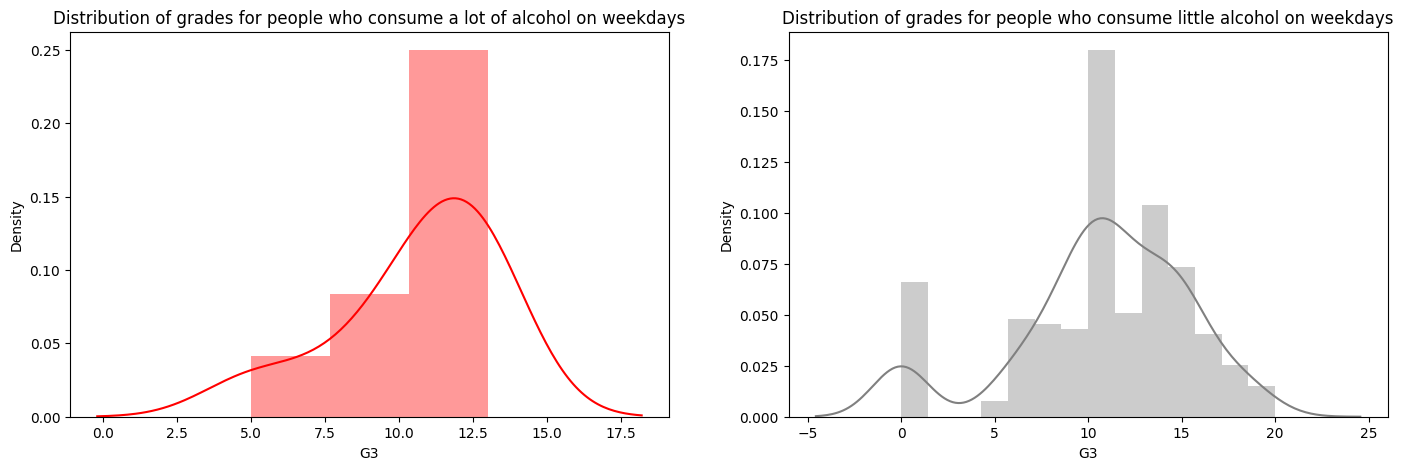

In [23]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Dalc == 5)]["G3"],color='red',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekdays')

ax=f.add_subplot(122)
sns.distplot(data[(data.Dalc == 1)]['G3'],color='gray',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekdays')

the number of those who love to drink on weekdays is much less than the number of those who prefer to spend weekdays sober.  But we can see that the final grades of these students are significantly lower.  Let's look at the situation with the consumption of alcohol on the weekend.



In [24]:
labels = data["Walc"].unique().tolist()
amount = data["Walc"].value_counts().tolist()

colors = ["yellow","cyan","green","orange","gray"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 't')

Of course the situation has changed. On weekends, more students like to relax and drink.  I wonder what the situation will be with the final grades.

Text(0.5, 1.0, 'Distribution of grades for people who consume little alcohol on weekend')

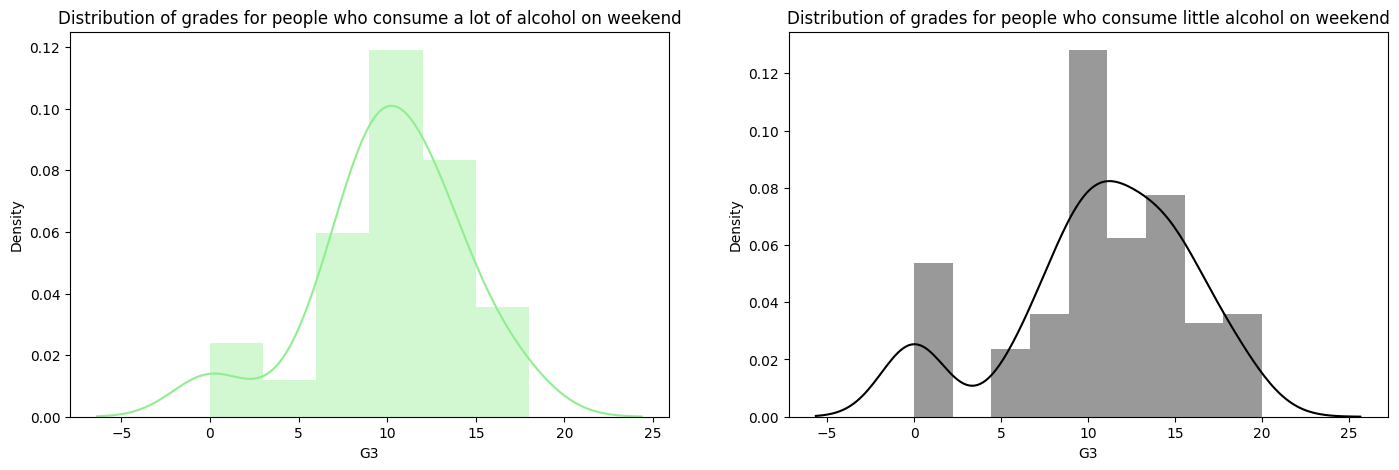

In [25]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Walc == 5)]["G3"],color='lightgreen',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekend')

ax=f.add_subplot(122)
sns.distplot(data[(data.Walc == 1)]['G3'],color='black',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekend')

On this happy note, I propose to consider one more important thing - additional paid courses that the student attends. It is good when a student wants to study extra, and parents have the opportunity to pay for courses. This can tell us not only about the commitment of the student, but also about the social status of the family. Personally, I did not understand as a child how important it is to engage not only in school, but also on their own. Let's see.

Text(0.5, 1.0, 'Distribution of final grades and age for students who have additional paid classes')

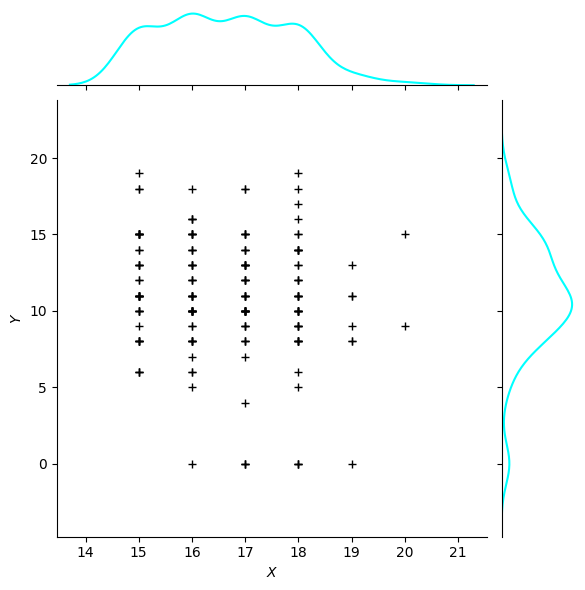

In [26]:
g = sns.jointplot(x="age", y="G3", data = data[(data.paid == 'yes')],kind="kde", color="cyan")
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of final grades and age for students who have additional paid classes')

Text(0.5, 1.0, 'Distribution of final grades and age for students who do not have additional paid classes')

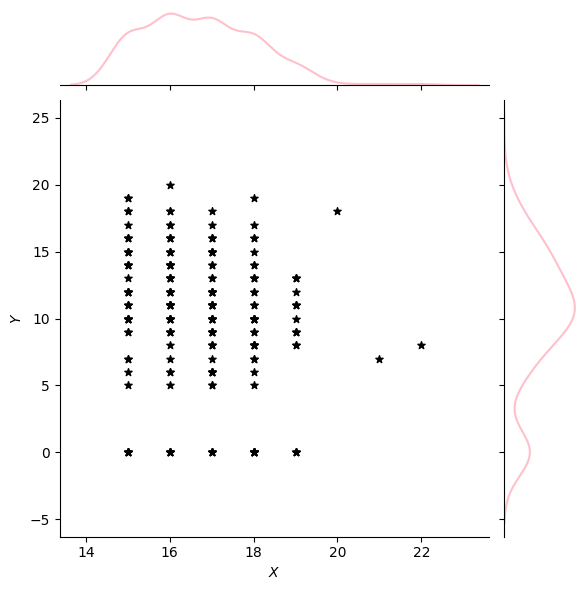

In [27]:
g = sns.jointplot(x="age", y="G3", data = data[(data.paid == 'no')],kind="kde", color="pink")
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="*")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of final grades and age for students who do not have additional paid classes')

Text(0.5, 1.0, 'Distribution of grades for students who do not have additional paid classes')

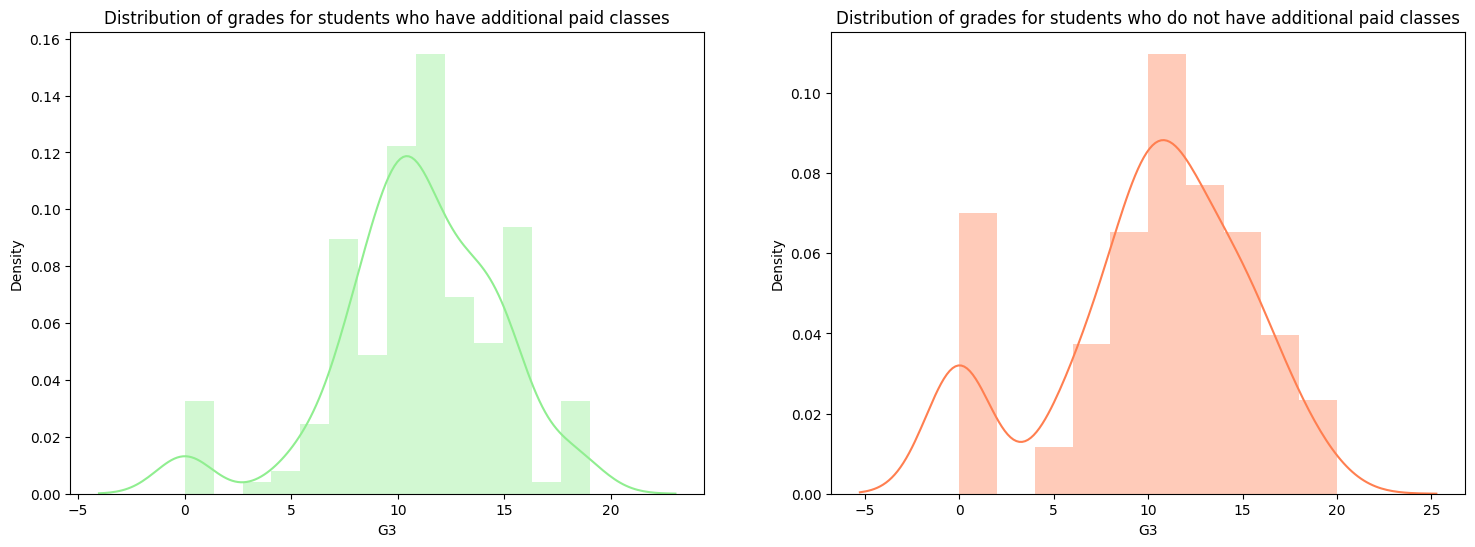

In [28]:
f= plt.figure(figsize=(18,6))

ax=f.add_subplot(121)
sns.distplot(data[(data.paid == 'yes')]["G3"],color='lightgreen',ax=ax)
ax.set_title('Distribution of grades for students who have additional paid classes')

ax=f.add_subplot(122)
sns.distplot(data[(data.paid == 'no')]['G3'],color='coral',ax=ax)
ax.set_title('Distribution of grades for students who do not have additional paid classes')

We also have information about the student's desire to get higher education in the future. This is useful information! Does the desire to get higher education influence the final grades?

Text(0.5, 1.0, 'How many students want to ger higher education?')

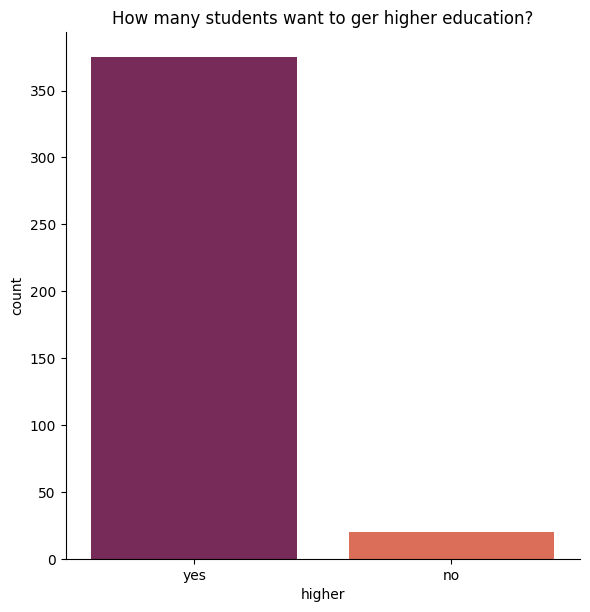

In [29]:
sns.catplot(x="higher", kind="count",palette="rocket", data=data, height = 6)
plt.title("How many students want to ger higher education?")

I am happy to see that almost all students want to get higher education. 

Text(0.5, 1.0, 'Distribution of grades for students who does not want to get higher education')

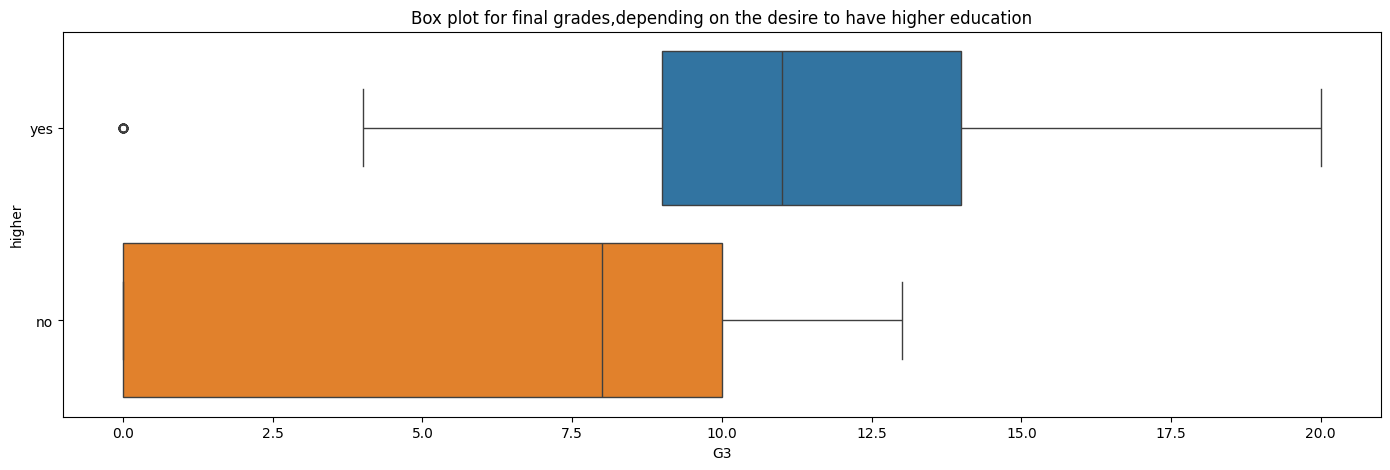

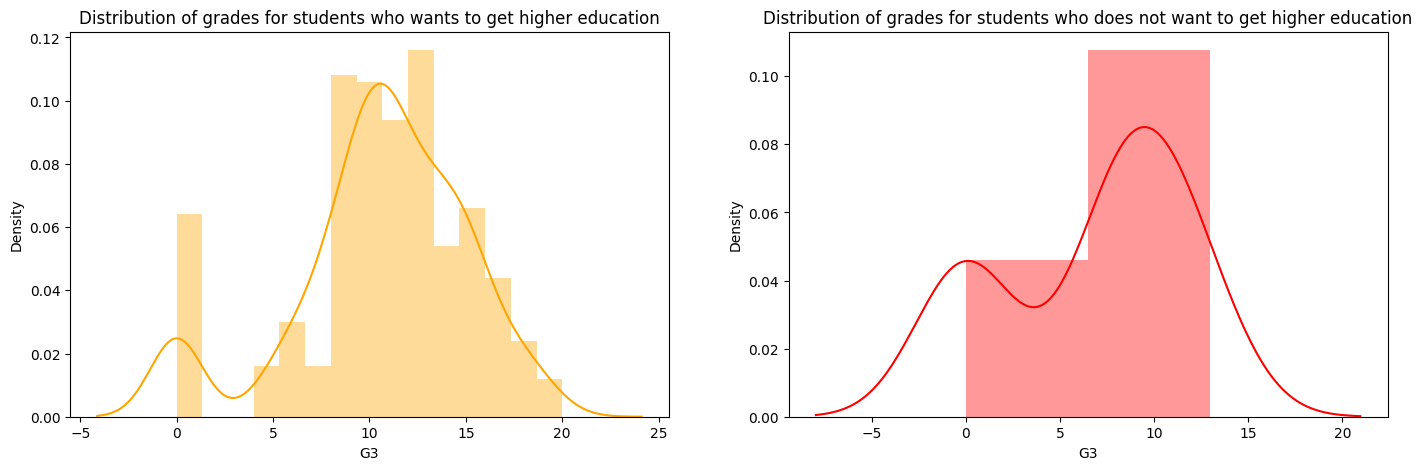

In [30]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the desire to have higher education")
sns.boxplot(y="higher", x="G3", data = data , orient="h", palette = 'tab10')

f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(data[(data.higher == 'yes')]["G3"],color='orange',ax=ax)
ax.set_title('Distribution of grades for students who wants to get higher education')

ax=f.add_subplot(122)
sns.distplot(data[(data.higher == 'no')]['G3'],color='red',ax=ax)
ax.set_title('Distribution of grades for students who does not want to get higher education')

The desire to get higher education stimulates students to get higher grades.
And of course I did not forget to pay attention to the presence of the Internet at the student's home. Nowadays, the Internet is very important. Quick access to information or the ability to find a solution to the problem without a long search in the textbooks

Text(0.5, 1.0, 'How many students have not Internet (yes, i am shocked too)?')

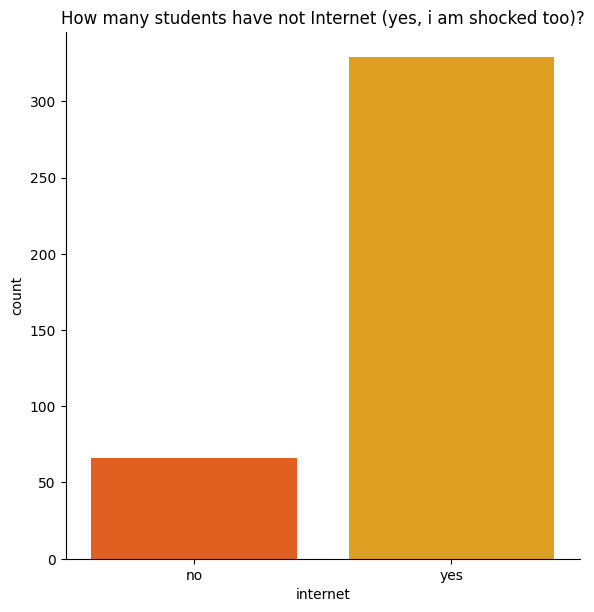

In [31]:
sns.catplot(x="internet", kind="count",palette="autumn", data=data, height = 6)
plt.title("How many students have not Internet (yes, i am shocked too)?")

First, let's see whether the availability of the Internet affects the number of hours students spend on their studies.

In [32]:
time1 =data[(data.internet == 'no')].st_time.value_counts()
labels = (np.array(time1.index))
sizes = (np.array((time1 / time1.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="How many hours do students without access to the Internet spend on studies?")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="time1")

In [33]:
time2 =data[(data.internet == 'yes')].st_time.value_counts()
labels = (np.array(time2.index))
sizes = (np.array((time2 / time2.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="How many hours do students with access to the Internet spend on studies?")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="time2")

I'm shocked. They spend less time! Are these students geniuses or lazy?

<Axes: title={'center': 'Box plot for final grades,depending on the access to the Internet'}, xlabel='G3', ylabel='internet'>

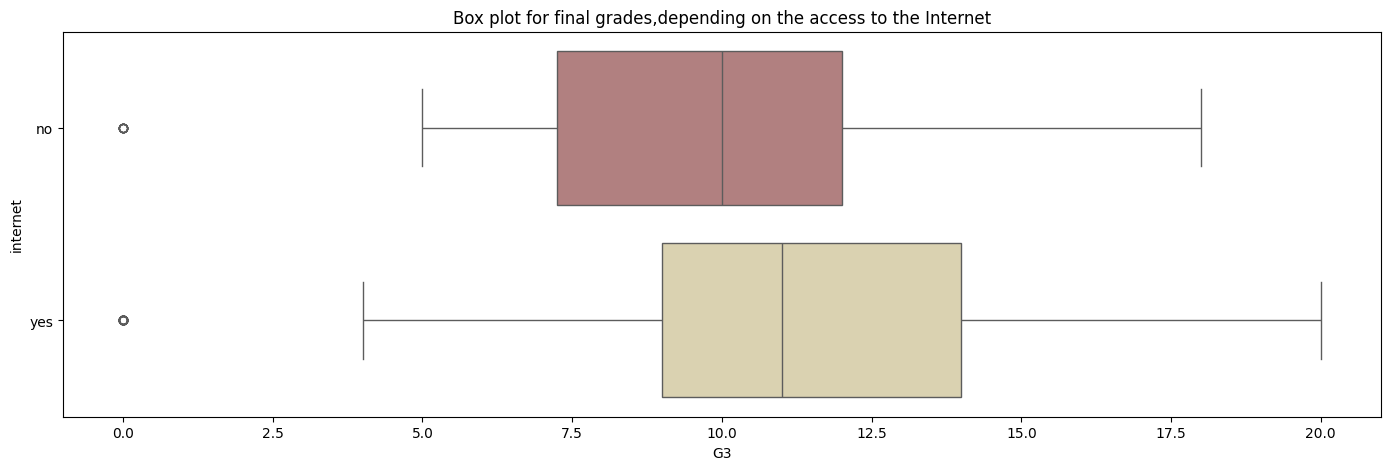

In [34]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the access to the Internet")
sns.boxplot(y="internet", x="G3", data = data , orient="h", palette = 'pink')


And the last thing we'll look at is the student's family. The family plays a very important role in the development of the child. The data set gives us a lot of information about the student's family, profession and education of parents and so on. We can't just walk away!
Let's start with the fact that we look at the number of people in the families of the student and the status of residence of parents: father and mother live together or not.

Text(0.5, 1.0, 'Number of people in the family: GT3 - more than 3, LE3 - less than 3')

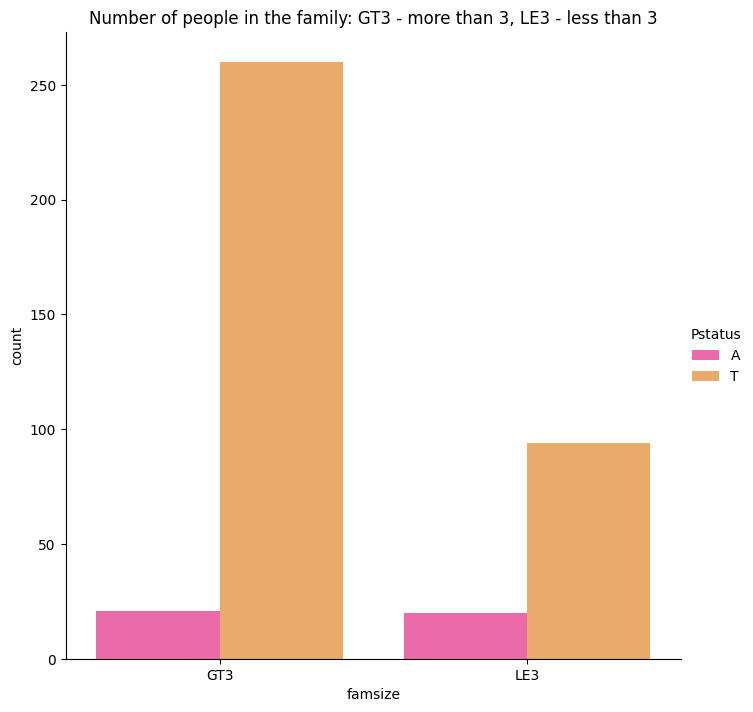

In [35]:
sns.catplot(x="famsize", kind="count",hue = "Pstatus",palette="spring", data=data, height = 7)
plt.title("Number of people in the family: GT3 - more than 3, LE3 - less than 3")

I am glad that most students live with their mother and father. We have a lot of information about parents of students. That's great! Let's see what the students  mothers do. How many of them are doctors, housewives, and so on.

In [36]:
labels = data["Mjob"].unique().tolist()
amount = data["Mjob"].value_counts().tolist()

colors = ["orange", "green", "yellow", "white",'cyan']

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Mother's job")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pi_chart')

Most mothers are housewives. And it was very surprising how many mothers work in medicine.  Let's see about the fathers.

In [37]:
labels = data["Fjob"].unique().tolist()
amount = data["Fjob"].value_counts().tolist()

colors = ["coral","lightgreen","gray","cyan","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Father's job")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pg_chart')

How many teachers!

<Axes: title={'center': 'Box plot for final grades,depending on fathers profession'}, xlabel='G3', ylabel='Fjob'>

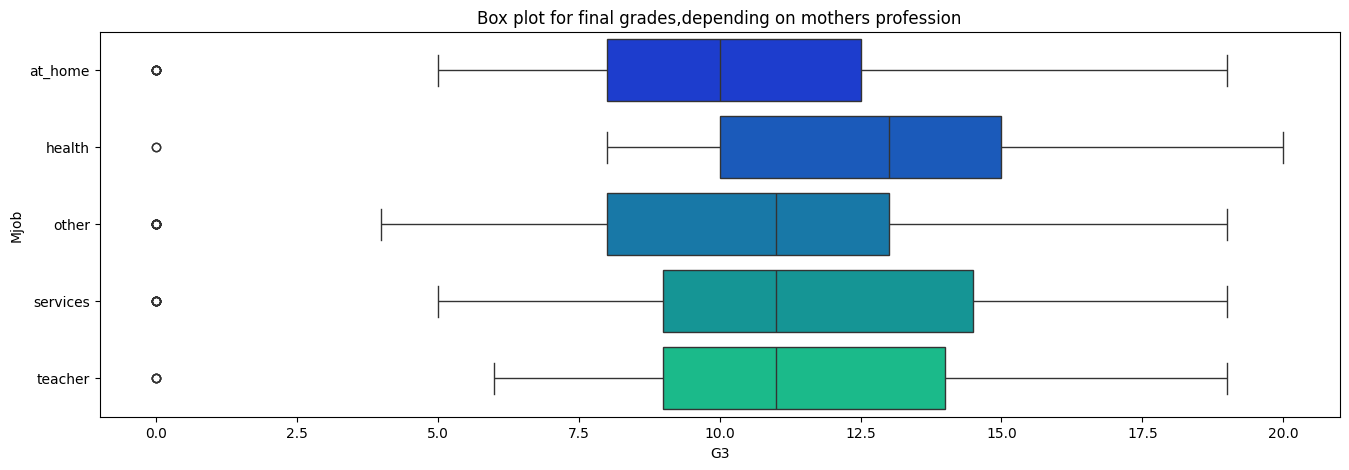

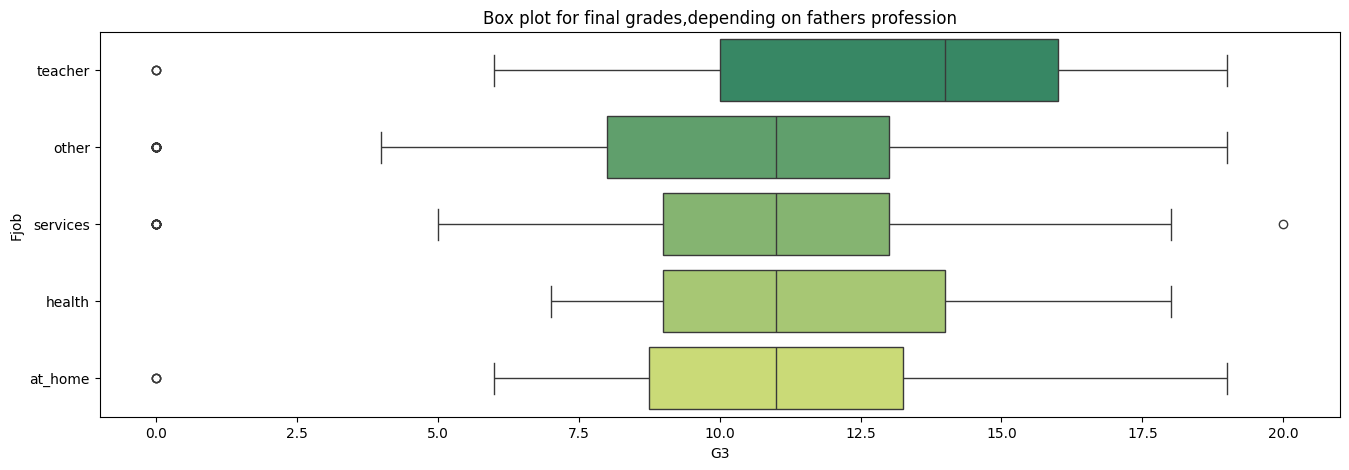

In [38]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on mothers profession")
sns.boxplot(y="Mjob", x="G3", data = data , orient="h", palette = 'winter')

plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on fathers profession")
sns.boxplot(y="Fjob", x="G3", data = data , orient="h", palette = 'summer')

It seems that mothers working in medicine instill in their children a great love for mathematics. (Someone doesn't like math? Nonsense...)
Last but not least, the quality of family relationships. It is a pity that you don't know what put the rating - children or parents.


In [39]:
labels = data["famrel"].unique().tolist()
amount = data["famrel"].value_counts().tolist()

colors = ["pink","cyan","coral","orange","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Quality of family relationships(numeric: from 1 - very bad to 5 - excellent)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pf_chart')

Of course here I wanted to see a completely cyan circle! Just for curious I want to separately look at the situation in families where parents live together.

In [40]:
labels = data[(data.Pstatus == 'T')].famrel.unique().tolist()
amount = data[(data.Pstatus == 'T')].famrel.value_counts().tolist()

colors = ["yellow","cyan","pink","orange","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Quality of relationships in families where parents live together (numeric: from 1 - very bad to 5 - excellent)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pf1_chart')

## Hypthesis Testing 

In [57]:
data[['romantic','G3']]

,romantic,G3
0,no,6
1,no,6
2,no,10
3,yes,15
4,no,10
...,...,...
390,no,9
391,no,16
392,no,7
393,no,10


In [58]:
mean_scores = data.groupby('romantic')['G3'].mean()

print(mean_scores)

romantic
no                   10.84
yes                   9.58
Name: G3, dtype: float64


In [59]:
romantic_yes = data[data['romantic'] == 'yes']['G3']
romantic_no = data[data['romantic'] == 'no']['G3']
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(romantic_yes, romantic_no)

# Outputting the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in G3 scores between students in a romantic relationship and those who are not.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in G3 scores between students in a romantic relationship and those who are not.")

T-statistic: -2.598595332345276
P-value: 0.009712726394119265
Reject the null hypothesis. There is a significant difference in G3 scores between students in a romantic relationship and those who are not.


In [65]:
def ttest_ind_with_p_value(data, column):
    yes = data[data[column] == 'yes']['G3']
    no = data[data[column] == 'no']['G3']
    t_stat, p_value = ttest_ind(yes, no)
    alpha = 0.05
    if p_value < alpha:
        print(f"Reject the null hypothesis. The p-value is {p_value:.5f}, which is less than {alpha}.")
    else:
        print(f"Fail to reject the null hypothesis. The p-value is {p_value:.5f}, which is greater than {alpha}.")
    return t_stat, p_value

In [67]:
mean_scores = data.groupby('internet')['G3'].mean()

print(mean_scores)

internet
no                    9.41
yes                  10.62
Name: G3, dtype: float64


In [66]:
ttest_ind_with_p_value(data,'internet')

Fail to reject the null hypothesis. The p-value is 0.05048, which is greater than 0.05.


(1.961894129334101, 0.05048021213717338)

The poeple who have internet tend to have higher scores even for the whole population